<a href="https://colab.research.google.com/github/Seahchye/hello-world/blob/master/Eng_Chye_Homework_5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install swifter

     |████████████████████████████████| 634kB 5.8MB/s 
     |████████████████████████████████| 471kB 9.0MB/s 
     |████████████████████████████████| 542kB 11.2MB/s 
     |████████████████████████████████| 92kB 7.5MB/s 
     |████████████████████████████████| 17.2MB 236kB/s 
     |████████████████████████████████| 23.1MB 1.3MB/s 
     |████████████████████████████████| 2.9MB 43.8MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
     |████████████████████████████████| 204kB 47.9MB/s 
     |████████████████████████████████| 81kB 9.7MB/s 
     |████████████████████████████████| 1.3MB 41.2MB/s 
     |████████████████████████████████| 133kB 49.3MB/s 
     |████████████████████████████████| 71kB 8.6MB/s 
     |████████████████████████████████| 296kB 45.7MB/s 
     |████████████████████████████████| 143kB 45.2MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 102kB 11.3MB/s 
  Created wheel for swifter: filename=swifter-1.0.7-cp36-non

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('darkgrid')

In [4]:
data_path = '/content/drive/My Drive/data'

country = pd.read_csv(os.path.join(data_path, 'country_clustering.csv'))
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [5]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()

In [9]:
country_remove = country.pop('country')
country_remove

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

In [10]:
country

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [11]:
country_scaled = pd.DataFrame(scl.fit_transform(country),
                              columns=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'])
country_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


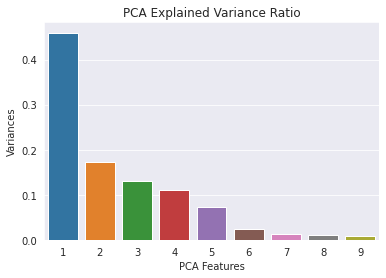

In [12]:
model = PCA()

country_scaled_pca = model.fit(country_scaled)

sns.barplot(x=list(range(1, len(country.columns) + 1)), y=model.explained_variance_ratio_)
plt.title('PCA Explained Variance Ratio')
plt.xlabel('PCA Features')
plt.ylabel('Variances')
plt.show()

In [13]:
country_scaled_pc5 = model.transform(country_scaled)
country_scaled_pc5

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Inertia'), Text(0.5, 0, 'Number of Clusters')]

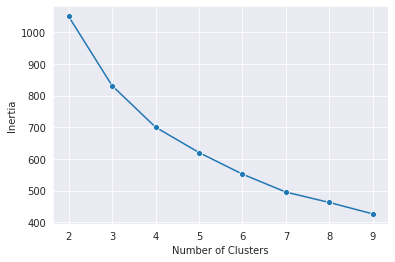

In [18]:
from sklearn.cluster import KMeans

data_to_fit = country_scaled_pc5

inertias = []

for i in range(2, 10):
    km = KMeans(
        n_clusters=i,
        init='k-means++',
        n_init=10,
        max_iter=300,
        random_state=42
    )
    km.fit(data_to_fit)
    inertias.append(km.inertia_)

ax = sns.lineplot(range(2, 10), inertias, marker='o')
ax.set(xlabel='Number of Clusters', ylabel='Inertia')

In [17]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Scaled dataset
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

results = []

data_to_fit = country_scaled_pc5

for i in range(2, 10):
    km = KMeans(
        n_clusters=i,
        init='k-means++',
        n_init=10,
        max_iter=300,
        random_state=42
    )
    km.fit(data_to_fit)
    score = silhouette_score(data_to_fit, km.labels_, metric='euclidean')
    results.append({'data': 'standard', 'method': 'silhouette', 'clusters': i, 'score': score})
    print(f'Silhouette score for {i} clusters: {score}')

    score = calinski_harabasz_score(data_to_fit, km.labels_)
    results.append({'data': 'standard', 'method': 'calinski-harabasz', 'clusters': i, 'score': score})
    print(f'Calinski-Harabasz score for {i} clusters: {score}')

    score = davies_bouldin_score(data_to_fit, km.labels_)
    results.append({'data': 'standard', 'method': 'davies-bouldin', 'clusters': i, 'score': score})
    print(f'Davies-Bouldin score for {i} clusters: {score}')
    print(f'--------------\n')

df_scaled = pd.DataFrame(results)

Silhouette score for 2 clusters: 0.28735668921406715
Calinski-Harabasz score for 2 clusters: 71.13746166773556
Davies-Bouldin score for 2 clusters: 1.304258692073325
--------------

Silhouette score for 3 clusters: 0.2832957568346313
Calinski-Harabasz score for 3 clusters: 66.23475806200636
Davies-Bouldin score for 3 clusters: 1.2769056099698284
--------------

Silhouette score for 4 clusters: 0.3013759623768811
Calinski-Harabasz score for 4 clusters: 62.27428937581001
Davies-Bouldin score for 4 clusters: 1.0435510782352655
--------------

Silhouette score for 5 clusters: 0.2992594995920442
Calinski-Harabasz score for 5 clusters: 57.65397493324222
Davies-Bouldin score for 5 clusters: 0.8717934158978675
--------------

Silhouette score for 6 clusters: 0.22733399552463046
Calinski-Harabasz score for 6 clusters: 55.47309220027883
Davies-Bouldin score for 6 clusters: 1.0704194737811104
--------------

Silhouette score for 7 clusters: 0.24905003461730515
Calinski-Harabasz score for 7 cluste

In [19]:
df_scaled.set_index(['method', 'clusters'], inplace=True)
df_scaled

,,data,score
method,clusters,,
silhouette,2,standard,0.287357
calinski-harabasz,2,standard,71.137462
davies-bouldin,2,standard,1.304259
silhouette,3,standard,0.283296
calinski-harabasz,3,standard,66.234758
davies-bouldin,3,standard,1.276906
silhouette,4,standard,0.301376
calinski-harabasz,4,standard,62.274289
davies-bouldin,4,standard,1.043551


In [23]:
km = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=10,
    max_iter=300,
    random_state=42
)

km.fit(country_scaled_pc5)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [24]:
country['cluster_id'] = km.labels_
country

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [27]:
country_concat = pd.concat([country_remove, country], axis=1)
country_concat

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [31]:
cluster_group = country_concat.groupby('cluster_id')['cluster_id'].count()
cluster_group

cluster_id
0    47
1    87
2     3
3    30
Name: cluster_id, dtype: int64

In [33]:
country_concat[country_concat.cluster_id == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,0
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,0
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,0
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,0
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,0
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,0


In [37]:
pd.set_option("max_rows", None)

country_concat[country_concat.cluster_id == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
1,Albania,16.6,28.000,6.55,48.6000,9930,4.490,76.3,1.65,4090,1
2,Algeria,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460,1
4,Antigua and Barbuda,10.3,45.500,6.03,58.9000,19100,1.440,76.8,2.13,12200,1
5,Argentina,14.5,18.900,8.10,16.0000,18700,20.900,75.8,2.37,10300,1
6,Armenia,18.1,20.800,4.40,45.3000,6700,7.770,73.3,1.69,3220,1
9,Azerbaijan,39.2,54.300,5.88,20.7000,16000,13.800,69.1,1.92,5840,1
10,Bahamas,13.8,35.000,7.89,43.7000,22900,-0.393,73.8,1.86,28000,1
11,Bahrain,8.6,69.500,4.97,50.9000,41100,7.440,76.0,2.16,20700,1
12,Bangladesh,49.4,16.000,3.52,21.8000,2440,7.140,70.4,2.33,758,1
13,Barbados,14.2,39.500,7.97,48.7000,15300,0.321,76.7,1.78,16000,1


In [35]:
country_concat[country_concat.cluster_id == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,2
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,2
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,2


In [36]:
country_concat[country_concat.cluster_id == 3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,3
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,3
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,3
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,3
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,3
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,3
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,3
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,3
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,3
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,3
